## Importaci√≥n de librer√≠as

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

## Instalaci√≥n del paquete Ultralytics

Este comando instala la librer√≠a 'ultralytics', la cual proporciona herramientas para entrenar y utilizar modelos YOLO (You Only Look Once),
incluyendo YOLOv8.

In [ ]:
!pip install -U ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 22.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 55.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 53.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

## Montar Google Drive en el entorno de Colab
Utilizamos esta l√≠nea porque el dataset ha sido almacenado en Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Descomprimir el dataset desde Google Drive

Esta l√≠nea extrae el contenido del conjunto de datos que fue almacenado en Google Drive para que pueda ser utilizado por el modelo YOLOv8 durante el proceso de entrenamiento y evaluaci√≥n.

En total se descomprimieron 428 im√°genes:
  * 410 para entrenamiento
  * 9 para validaci√≥n
  * 9 para prueba

In [ ]:

!unzip "/content/drive/MyDrive/data_set_vision_computacional/ProyectoFinal_v4.v3i.yolov8"

Archive:  /content/drive/MyDrive/data_set_vision_computacional/ProyectoFinal_v4.v3i.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/mano1_jpg.rf.412d192985a4a664e97f1b6af025a282.jpg  
 extracting: test/images/mano2_jpg.rf.c117b8d4aded48bc32874efca4a0e415.jpg  
 extracting: test/images/mano30_jpg.rf.17bbddceff101223a754da48fce297e0.jpg  
 extracting: test/images/mano_1_jpg.rf.a1408dd5e514a60821b1f389fb44511a.jpg  
 extracting: test/images/mano_5_jpg.rf.214dc04ac20d43eede3ae55cb305d6e8.jpg  
 extracting: test/images/puno27_jpg.rf.0c8bc4c5c1bd4e7366c00742b28e1336.jpg  
 extracting: test/images/puno35_jpg.rf.a67c3b1e01ad6ce0ada96a868ab8f488.jpg  
 extracting: test/images/puno7_jpg.rf.c5d8c10518232b459a3f96bf691db446.jpg  
 extracting: test/images/puno_3_jpg.rf.71251e31c7a6a97c27b64a524f3c54cc.jpg  
   creating: test/labels/
  inflating: test/lab

## Impotacion del m√≥dulo principal YOLO

verificaci√≥n (`ultralytics.checks()`) confirma que todas las dependencias necesarias est√°n instaladas correctamente.

In [ ]:

from ultralytics import YOLO
import ultralytics
ultralytics.checks()

Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


## Establecer variable HOME
se establece una variable llamada HOME que apunta al directorio principal en Google Colab (`/content/`). Esto facilitara la gesti√≥n de rutas al guardar o acceder a archivos durante el entrenamiento y la inferencia del modelo.

In [ ]:
HOME = "/content/"

## Par√°metros principales para el entrenamiento:

* **task=segment** par√°metro que indica que la tarea que se quiere resolver es la segmentaci√≥n de instancias.

* **model=yolov8s-seg.pt** Se selecciona el modelo YOLOv8 Small con capacidad para segmentaci√≥n (-seg).

* **mode=train** Modo que indica que la tarea sera de entrenamiento del modelo.

* **data=/content/data.yaml** Archivo de configuraci√≥n del dataset. Este archivo yaml contiene la ruta a las im√°genes de entrenamiento y validaci√≥n, as√≠ como las clases ("palma" y "puno").

* **epochs=200** El modelo se entrenar√° durante 200 √©pocas.

* **imgsz=640** Redimensionar las imagenes a 640 √ó 640 p√≠xeles.



In [ ]:
%cd {HOME}
!yolo task=segment model=yolov8s-seg.pt mode=train data=/content/data.yaml epochs=200 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 116MB/s]
Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

## Resultados del Entrenamiento

El modelo fue entrenado durante 122 √©pocas, con parada anticipada activada (EarlyStopping) al no observarse mejoras significativas durante las √∫ltimas 100 √©pocas. El mejor desempe√±o se alcanz√≥ en la √©poca 22, y el modelo correspondiente se guard√≥ como best.pt.

En la validaci√≥n, el modelo YOLOv8s-seg mostr√≥ un buen rendimiento:

| M√©trica                    | Valor  |
|----------------------------|--------|
| Precisi√≥n (Box) global     | 0.836  |
| Recall (Box) global        | 0.840  |
| mAP@0.5 (Box)              | 0.933  |
| Precisi√≥n (M√°scara) global | 0.836  |
| Recall (M√°scara) global    | 0.840  |
| mAP@0.5 (M√°scara)          | 0.933  |

#### M√©tricas por Clase

| Clase | Precisi√≥n | mAP@0.5 |
|-------|-----------|---------|
| Palma | 1.000     | 0.995   |
| Pu√±o  | 0.671     | 0.870   |

Esto indica que el modelo identifica con gran precisi√≥n la clase palma, mientras que tiene un rendimiento algo inferior con la clase pu√±o, posiblemente debido a mayor variabilidad en la forma o condiciones de captura.

El tiempo promedio por imagen fue:

| Tipo | tiempo |
|-------|-----------|
| Preprocesamiento | 0.2‚ÄØms    |
| Inferencia  | 5.2‚ÄØms     |
| Postproceso  | 1.8‚ÄØms     |



## Importaci√≥n para mostrar im√°genes en Colab

In [ ]:
from IPython.display import display, Image

## carga y mostrar imagen
solo mostramos la matriz de confusi√≥n

/content


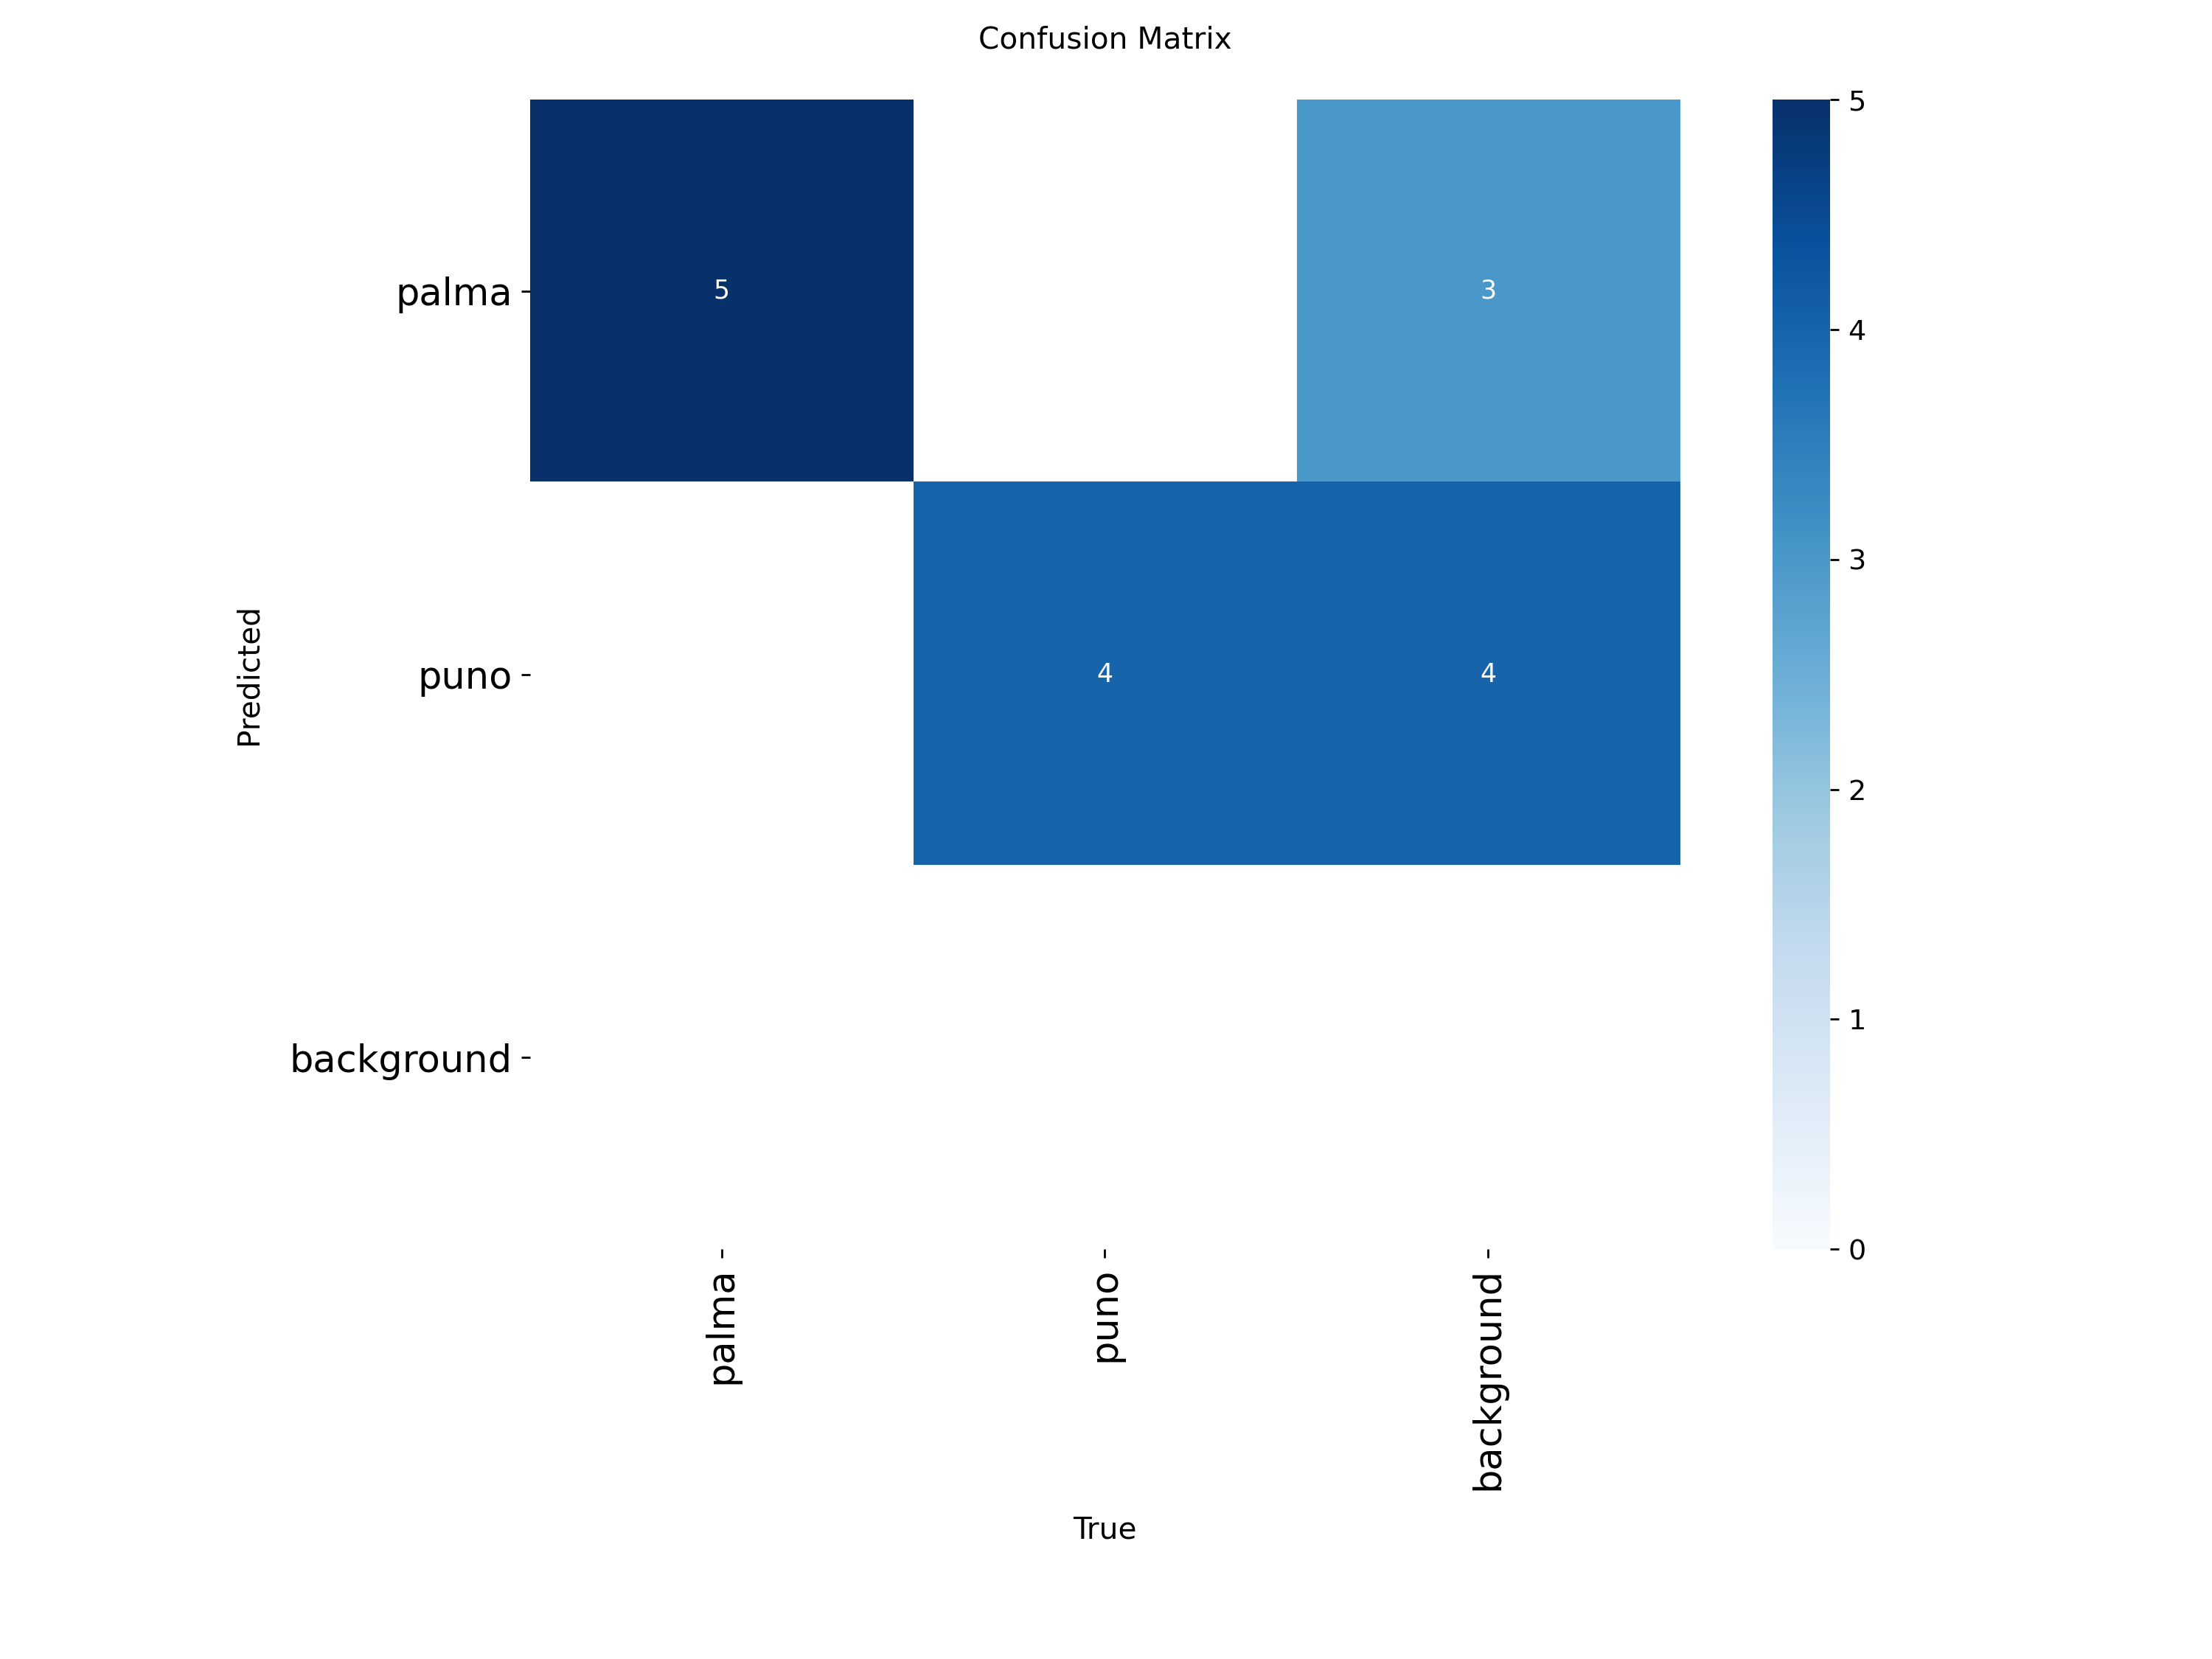

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

## Estructura de la Matriz de Confusi√≥n
La matriz de confusi√≥n est√° organizada en tres clases:

palma: Clase representando im√°genes de la mano abierta.
pu√±o: Clase representando im√°genes de la mano cerrada.
background: Clase representando el fondo o entorno en que aparecen las manos.

## Interpretaci√≥n de Resultados
* predicciones correctas:

  * palma: 5 im√°genes fueron correctamente clasificadas como "palma".
  * pu√±o: 4 im√°genes fueron correctamente clasificadas como "pu√±o".

* predicciones incorrectas:

  * palma como pu√±o: El modelo confundi√≥ 3 im√°genes de "palma" con "pu√±o".
  * pu√±o como palma: El modelo confundi√≥ 4 im√°genes de "pu√±o" con "palma".
  * background: no se observan errores relacionados con el fondo

## carga y mostrar imagen
solo mostramos los resultados del entrenamiento

/content


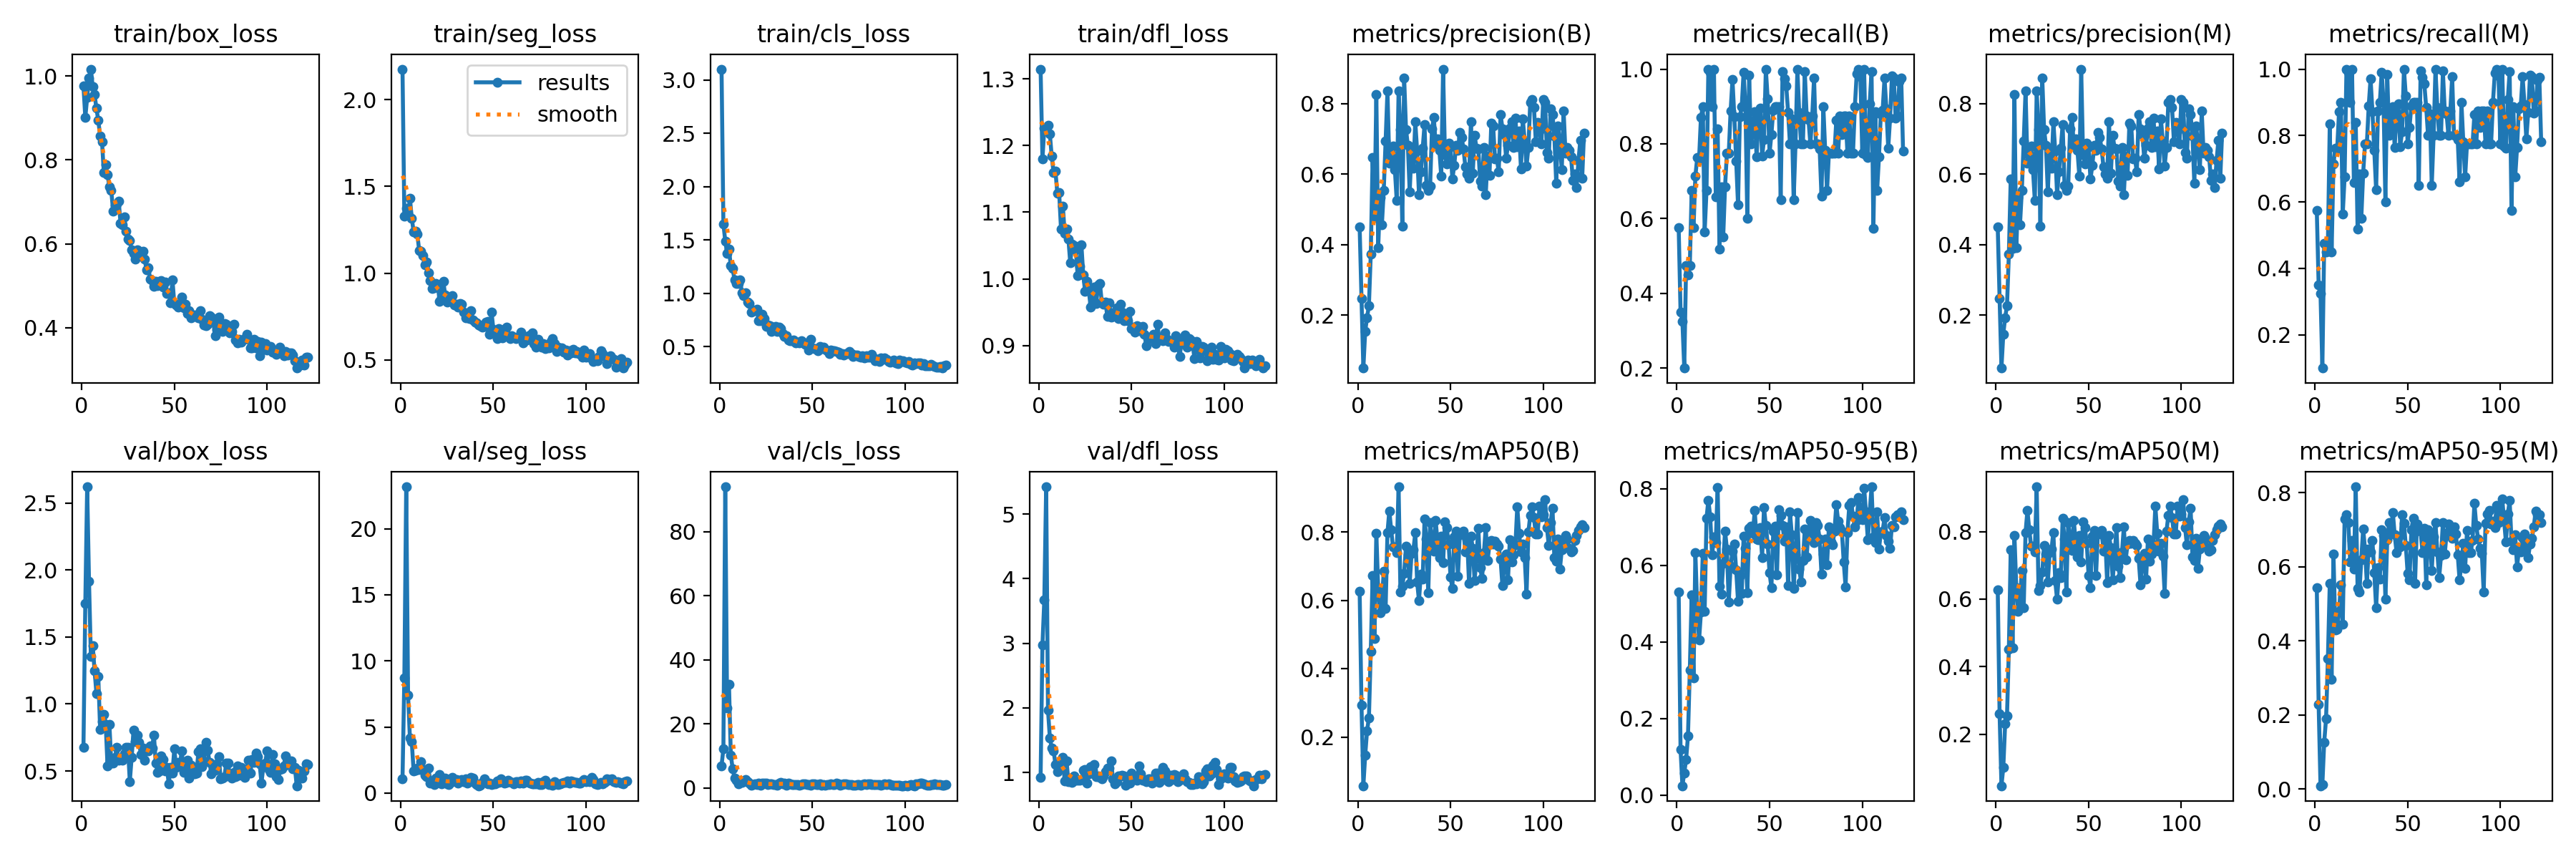

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1000)

## Resumen de Resultados de Entrenamiento

### P√©rdidas:

Las p√©rdidas de entrenamiento (box_loss, seg_loss, cls_loss, dfl_loss) muestran una tendencia a la baja, indicando que el modelo mejora con el tiempo.
Las p√©rdidas de validaci√≥n tambi√©n disminuyen, sugiriendo que el modelo generaliza bien sin sobreajuste.

### M√©tricas:

Precisi√≥n y Recall:
* La clase "palma" muestra excelentes m√©tricas, reflejando buena detecci√≥n (precisi√≥n cerca de 1.0).
* La clase "pu√±o" tiene un rendimiento menor, indicando confusiones en su identificaci√≥n.

mAP (mean Average Precision):
* Valores de mAP son altos, lo que sugiere un buen rendimiento general del modelo en localizaci√≥n y clasificaci√≥n.

### Tiempos:

El tiempo promedio por imagen es:
* Preprocesamiento: 0.2 ms
* Inferencia: 5.2 ms
* Postproceso: 1.8 ms

## Ejecuci√≥n de Validaci√≥n del Modelo

* **task=segment:** Especifica la tarea que se desea realizar, en este caso, la segmentaci√≥n.

* **mode=val:** Establece el modo de ejecuci√≥n a validaci√≥n.

* **model="/content/runs/segment/train/weights/best.pt":** Esta es la ruta al archivo del modelo que se quiere evaluar (contiene los pesos).

* **data="/content/data.yaml":** Especifica el archivo de configuraci√≥n del conjunto de datos. Este archivo debe contener la informaci√≥n necesaria para cargar las im√°genes y definir las clases ("palma" y "puno").

In [ ]:
!yolo task=segment mode=val model="/content/runs/segment/train/weights/best.pt" data="/content/data.yaml"

Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 1165.3¬±324.6 MB/s, size: 28.3 KB)
val: Scanning /content/valid/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.97it/s]
                   all          9          9      0.836       0.84      0.933      0.803      0.836       0.84      0.933      0.816
                 palma          5          5          1      0.931      0.995      0.864          1      0.931      0.995      0.841
                  puno          4          4      0.671       0.75       0.87      0.743      0.671       0.75       0.87      0.792
Speed: 0.3ms preprocess, 18.7ms inference, 0.0ms loss, 18.4ms po

## Resultados de Validaci√≥n

Una vez completado el entrenamiento, se evalu√≥ el desempe√±o del modelo en el conjunto de validaci√≥n. A continuaci√≥n se presentan las m√©tricas m√°s relevantes:

### M√©tricas Globales

| M√©trica                          | Valor  |
|----------------------------------|--------|
| Precisi√≥n (Box) global           | 0.836  |
| Recall (Box) global              | 0.840  |
| mAP@0.5 (Box)                    | 0.933  |
| Precisi√≥n (M√°scara) global       | 0.803  |
| Recall (M√°scara) global          | 0.836  |
| mAP@0.5 (M√°scara)                | 0.816  |

Estas m√©tricas indican que el modelo no solo detecta correctamente la mayor√≠a de los gestos, sino que tambi√©n logra segmentar sus formas con una buena precisi√≥n. El valor de **mAP@0.5** representa el promedio de precisi√≥n permitido con una superposici√≥n del 50% entre la predicci√≥n y la etiqueta real, mientras que **mAP@0.5:0.95** es una m√©trica m√°s rigurosa que promedia sobre varios umbrales de superposici√≥n.

### M√©tricas por Clase

| Clase | Im√°genes | Precisi√≥n | mAP@0.5 |
|-------|----------|-----------|---------|
| Palma | 5        | 1.000     | 0.995   |
| Pu√±o  | 4        | 0.671     | 0.870   |

Esto muestra que el modelo identifica con gran precisi√≥n la clase "palma", mientras que su rendimiento en la clase "pu√±o" es m√°s bajo, posiblemente debido a la mayor variabilidad en la forma y las condiciones de captura.

### Tiempo Promedio por Imagen

El tiempo promedio por imagen durante la validaci√≥n fue:

| Tipo               | Tiempo  |
|--------------------|---------|
| Preprocesamiento   | 0.3 ms  |
| Inferencia         | 18.7 ms |
| Postproceso        | 18.4 ms |

Estos tiempos reflejan la eficiencia del modelo en la inferencia. A pesar del mayor tiempo de inferencia, los resultados de precisi√≥n y recall son alentadores.

## Resultados visuales
A continuaci√≥n, se muestran algunos ejemplos visuales de las predicciones del modelo sobre im√°genes reales del conjunto de prueba. En ellas se puede observar c√≥mo el modelo identifica correctamente tanto la clase (palma o pu√±o) como su contorno.

### Ejemplo 1 - Palma detectada con el 0.1 de confianza

In [ ]:
###
!yolo task=segment mode=predict model="/content/runs/segment/train/weights/best.pt" conf=0.1 source="/content/mano_abierta_prueba.jpg"


Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/mano_abierta_prueba.jpg: 640x480 1 palma, 48.7ms
Speed: 3.4ms preprocess, 48.7ms inference, 170.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
üí° Learn more at https://docs.ultralytics.com/modes/predict


### Detalles de la Predicci√≥n
Imagen Procesada:
* Ruta: /content/mano_abierta_prueba.jpg
* Dimensiones de entrada: 640x480 p√≠xeles.

Resultados:
* Detecci√≥n: Se detect√≥ 1 palma durante la predicci√≥n.

Tiempos de Ejecuci√≥n:

* Preprocesamiento: 3.4 ms
* Inferencia: 48.7 ms
* Postproceso: 170.5 ms
* Forma de entrada: (1, 3, 640, 480)

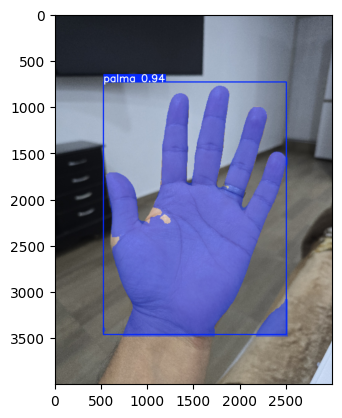

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("/content/runs/segment/predict/mano_abierta_prueba.jpg")
plt.imshow(im)
plt.show()

### Ejemplo 2 - Palma detectada con el 0.8 de confianza

In [ ]:
###
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.8 source=/content/mano_abierta_prueba.jpg save=true
##

Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/mano_abierta_prueba.jpg: 640x480 1 palma, 87.8ms
Speed: 4.9ms preprocess, 87.8ms inference, 204.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict7
üí° Learn more at https://docs.ultralytics.com/modes/predict


### Detalles de la Predicci√≥n
Imagen Procesada:
* Ruta: /content/mano_abierta_prueba.jpg
* Dimensiones de entrada: 640x480 p√≠xeles.

Resultados:
* Detecci√≥n: Se detect√≥ 1 palma durante la predicci√≥n.

Tiempos de Ejecuci√≥n:
* Preprocesamiento: 4.9 ms
* Inferencia: 87.8 ms
* Postproceso: 204.6 ms
* Forma de entrada: (1, 3, 640, 480)

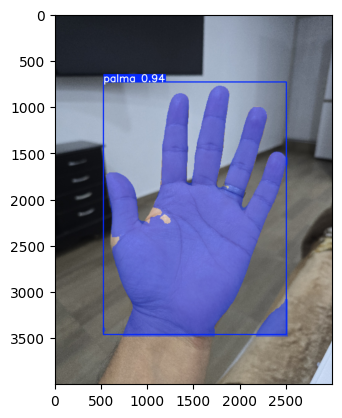

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("/content/runs/segment/predict7/mano_abierta_prueba.jpg")
plt.imshow(im)
plt.show()

### Ejemplo 3 - Pu√±o detectado con el 0.1 de confianza

In [ ]:
###
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.1 source=/content/puno.jpg save=true
##

Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/puno.jpg: 640x480 3 punos, 65.4ms
Speed: 4.3ms preprocess, 65.4ms inference, 156.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict3
üí° Learn more at https://docs.ultralytics.com/modes/predict


### Detalles de la Predicci√≥n
Imagen Procesada:
* Ruta: /content/puno.jpg
* Dimensiones de entrada: 640x480 p√≠xeles.

Resultados:
* Detecci√≥n: Se detectaron 3 pu√±os durante la predicci√≥n.

Tiempos de Ejecuci√≥n
* Preprocesamiento: 4.3 ms
* Inferencia: 65.4 ms
* Postproceso: 156.7 ms
* Forma de entrada: (1, 3, 640, 480)

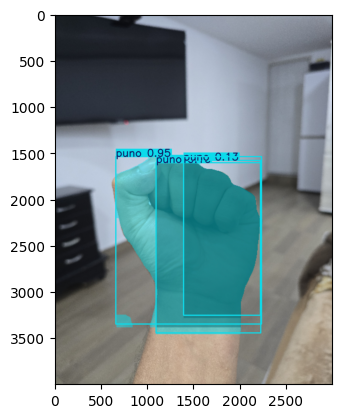

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("/content/runs/segment/predict3/puno.jpg")
plt.imshow(im)
plt.show()

### Ejemplo 4 - Pu√±o detectado con el 0.8 de confianza

In [ ]:
###
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.8 source=/content/puno.jpg save=true
##

Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/puno.jpg: 640x480 1 puno, 48.6ms
Speed: 3.3ms preprocess, 48.6ms inference, 146.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict8
üí° Learn more at https://docs.ultralytics.com/modes/predict


### Detalles de la Predicci√≥n
Imagen Procesada:
* Ruta: /content/puno.jpg
* Dimensiones de entrada: 640x480 p√≠xeles.

Resultados:
* Detecci√≥n: Se detect√≥ 1 pu√±o en la imagen.

Tiempos de Ejecuci√≥n
* Preprocesamiento: 3.3 ms
* Inferencia: 48.6 ms
* Postproceso: 146.2 ms
* Forma de entrada: (1, 3, 640, 480)

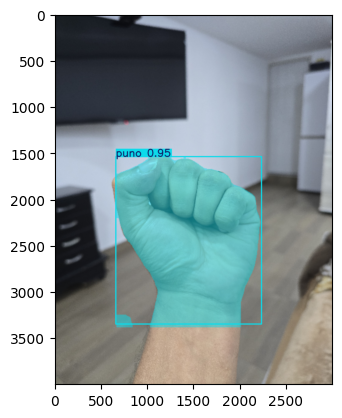

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("/content/runs/segment/predict8/puno.jpg")
plt.imshow(im)
plt.show()